In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/cleaned/cb_04_08.csv', low_memory=False)

In [ ]:
df['date'] = pd.to_datetime(df['Reporting Period End Date'])
sorted_df = df.sort_values(by='date')

unique_dates = sorted_df['date'].unique()
date_mapping = {date: i+1 for i, date in enumerate(unique_dates)}

sorted_df['date_index'] = sorted_df['date'].map(date_mapping)

listA = list(sorted_df[sorted_df['date_index'] == 1]['CERT'])

record = list(range(1, 21))
counts = []
for time in record:
    listB = list(sorted_df[sorted_df['date_index'] == time]['CERT'])
    count = sum(element in listB for element in listA)
    counts.append(count)
    
counts_fault = [
    len(list(sorted_df[sorted_df['date_index'] == _]['CERT']))
    for _ in range(1, 21)
]
  

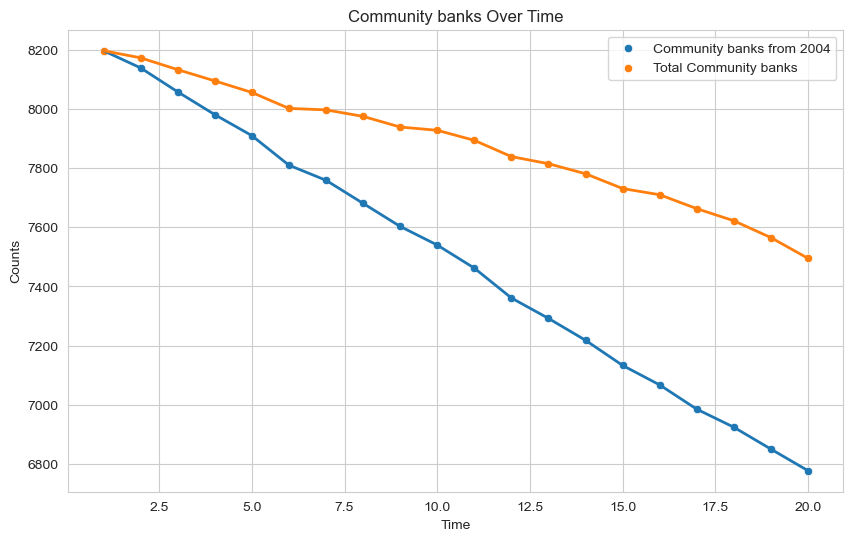

In [11]:
import seaborn as sns
sns.set_style("whitegrid")

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the data
sns.scatterplot(x=record, y=counts, marker='o', label='Community banks from 2004')
sns.lineplot(x=record, y=counts, linewidth=2)
sns.scatterplot(x=record, y=counts_fault, marker='o', label='Total Community banks')
sns.lineplot(x=record, y=counts_fault, linewidth=2)

# Set plot title and axis labels
plt.title('Community banks Over Time')
plt.xlabel('Time')
plt.ylabel('Counts')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [115]:
unique_bank = sorted_df['CERT'].unique()
date_last = []
for bank in unique_bank:
    value = max(sorted_df[sorted_df['CERT'] == bank]['date_index'])
    date_last.append(value)
    sorted_df.loc[sorted_df['CERT'] == bank, 'last'] = value
    

(1.0, 19.0)

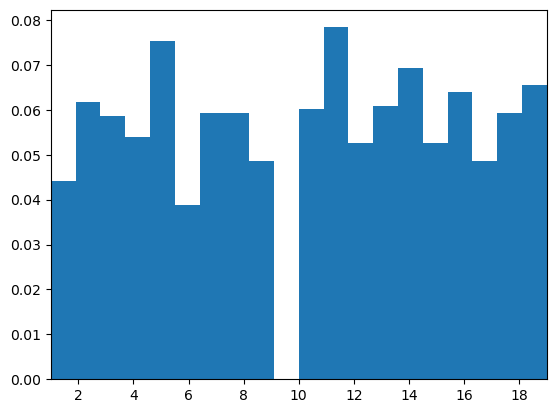

In [111]:

my_list = [x for x in date_last if x != 20]
plt.hist(my_list, bins=20, density=True)
plt.xlim(1, 19)

In [112]:
from collections import Counter

# Count the occurrences of each value in the list
value_counts = Counter(date_last)

# Calculate the total number of elements in the list
total_elements = len(date_last)

# Create an empty dictionary to store the probability distribution
probability_distribution = {}

# Calculate the probability for each value
for value, count in value_counts.items():
    probability_distribution[value] = count / total_elements

print(probability_distribution)

{20: 0.836962590731435, 13: 0.00893355667225014, 8: 0.008710217755443886, 17: 0.007146845337800111, 5: 0.011055276381909548, 12: 0.007705192629815745, 14: 0.010161920714684533, 19: 0.0096035734226689, 15: 0.007705192629815745, 4: 0.007928531546621998, 11: 0.011501954215522055, 16: 0.009380234505862646, 10: 0.008821887213847013, 7: 0.008710217755443886, 9: 0.007146845337800111, 18: 0.008710217755443886, 6: 0.005695142378559464, 3: 0.00859854829704076, 2: 0.009045226130653266, 1: 0.0064768285873813515}


In [120]:
sorted_df['survival'] = sorted_df['last'].map(probability_distribution)

In [122]:
sorted_df.to_csv('04_08_finwlabel.csv', index=False)